In [0]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from google.colab import files
from matplotlib import cm

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
google = pd.read_csv('gdrive/My Drive/CoderSchool-FTMLE/week_3/assignments/data/02-google-play-store/google-play-store.csv')

##Clean Data


####Drop rows with wrong values

In [0]:
google.drop(10472,inplace = True)

In [0]:
google = google.reset_index(drop=True)

####Pre processing price

In [0]:
def pre_processing_price(price):
    s = re.sub(r'[^0-9.]','',price)
    if len(s)==0:
        s = 0
    return round(float(s),2)

In [0]:
google["Price"] = google["Price"].apply(pre_processing_price)

####Pre processing installs

In [0]:
def pre_processing_installs(install):
    s = re.sub(r'[^0-9]','',install)
    if len(s)==0:
        s = 0
    return int(s)

In [0]:
google["Clean Installs"] = google["Installs"].apply(pre_processing_installs)

####Pre processing size

In [0]:
google['Clean Size'] = google['Size'].map(lambda x: x.rstrip('M'))
google['Clean Size'] = google['Clean Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
google['Clean Size'] = google['Clean Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

In [0]:
google['Clean Size'] = google['Clean Size'].astype(float)

####Create new revenue column:
>* If paid app: revenue = installation * price
* If free app: revenue = installation * 0.02 ( $ 0.02 per install according to Forbes) 

In [0]:
def create_revenue(df):
    df["Revenue"] = np.nan
    for i in range(df.shape[0]):
        if df.loc[i,"Type"] == "Free":
            df.loc[i,"Revenue"]=df.loc[i,"Clean Installs"]* 0.02
        else:
            df.loc[i,"Revenue"]=df.loc[i,"Clean Installs"]* df.loc[i,"Price"]

In [0]:
create_revenue(google)

####Split data into two type: free vs paid app

In [0]:
free_app = google[google["Type"]=="Free"]
paid_app = google[google["Type"]=="Paid"]

In [0]:
google.Rating.fillna(value = round(google.Rating.mean(),2),inplace = True)

In [0]:
google["Clean Size"].fillna(value = round(google["Clean Size"].mean(),2),inplace = True)

In [0]:

google.to_csv("final.csv")
files.download('final.csv')

##Data analysis

###Compare FREE apps and PAID apps 

####Compare the number of apps created and revenue generated by different types of app




In [0]:
google[google["Type"]== "Free"]

In [0]:
apps = google.groupby("Type").App.count()
revenues = google.groupby("Type").Revenue.sum()
free_paid = pd.concat([apps,revenues],axis=1)
free_paid["Revenue per App"] = free_paid["Revenue"]/free_paid["App"]
free_paid

,App,Revenue,Revenue per App
Type,,,
Free,10039,3.351210e+09,333819.060476
Paid,800,3.886294e+08,485786.807237


In [0]:
free_paid.to_csv("free_paid.csv")
files.download('free_paid.csv')

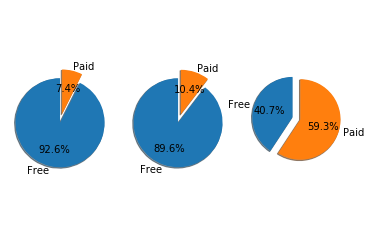

In [0]:
fig, ax = plt.subplots(1, 3)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
explode=(0,0.2)
ax[0].pie(apps.values, explode=explode, labels=apps.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].axis('equal')
ax[1].pie(revenues.values, explode=explode, labels=revenues.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')
ax[2].pie(free_paid["Revenue per App"], explode=explode, labels=free_paid.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].axis('equal')
fig.show()

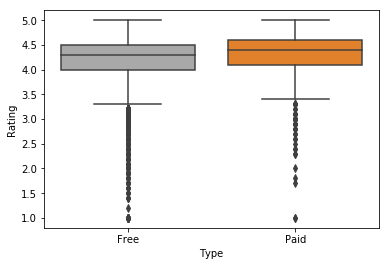

In [0]:
# plt.figure(figsize=(50,50))
bplot = sns.boxplot(x=google["Type"],y= google["Rating"])
continents=["darkgray","darkorange"]
for i in range(0,1):
    mybox = bplot.artists[i]
    mybox.set_facecolor(continents[i])

**Looking at the first pie chart, it is clear that the free apps dominate the app market. More than 90% of app on google play store is free. Based on the human natural instinct, people would prefer free stuff than charged things. Therefore, the total installation of free apps outweigh paid apps, leading to a higher total revenue. On the other hand, the revenue per paid app is nearly 10% higher than per free app. Beside the revenue, the average rate of rating in paid apps is at a great height.If you dig deeper into the boxplot above, what stands out is that free apps have much more outliers than paid apps. This means that lots of free apps are not well built and the competition in the app market is rather tough. It points out that even if your app is free, it must reach a higher standard due to how there is a large mass of free apps on the market.**

**In brief, based on the above observation, when it comes to decide between which types of app to develope. You must evaluate on  2 aspects. Do you want your app to be used by a larger audience or do you want to make the most out of it. If you want to attract as many users as possible then free apps is your answer. as of free apps. However, if you want to earn high revenue, then you should go with paid app. But in both case, remember that app market is larger and diverse so you must put enough effort in creating the app. Otherwise, you can't attract customers. even if your app is free.**

Observing the first pie chart, it is clear that the free apps dominate the app market. Over 90% of apps in the google play store is free. Based on the human natural instinct, people would prefer free options over charged ones. Therefore, the total installation of free apps outweigh paid apps, leading to a higher total revenue. On the other hand, the revenue per paid app is nearly 10% higher than per free app. Beside the revenue, the average rate of rating in paid apps is at a great height.Digging deeper into the boxplot above, what stands out is that the free apps have many more outliers than paid apps. This means that lots of free apps are not expertly buit and the competition in the app market is quite harsh. It points out that even if your app is free, it mush reach a higher standard due to how there is a large mass of free apps on the market.

In brief, based on the above observation, when it comes to decide between which types of app to develope. You must evaluate on 2 aspects. Do you want your app to be used by a larger audience or do you want to make the most out of it. If you want to attract as many users as possible then free apps is your answer. as of free apps. However, if you want to earn high revenue, then you should go with paid app. But in both case, remember that app market is larger and diverse so you must put enough effort in creating the app. Otherwise, you can't attract customers. even if your app is free.

###Free app

#### Top 9 populated apps and their revenue

In [0]:
fa_top9Revenue = free_app.groupby("Category").sum()["Revenue"].\
                                    sort_values(ascending=False).head(9)
fa_top9Revenue["OTHERS"] =free_app["Revenue"].sum() - fa_top9Revenue.sum()

In [0]:
fa = free_app[free_app["Category"].isin(fa_top9Revenue.index)]
fa_nofApps = fa.groupby("Category").App.count()
fa_nofApps["OTHERS"] = free_app[~free_app["Category"].isin(fa_top9Revenue.index)].App.count()
fa_revenue_per_app_cat = fa_top9Revenue /fa_nofApps
fa_revenue_per_app_cat=fa_revenue_per_app_cat.sort_values(ascending=False)

In [0]:
fa_top9Revenue.to_csv("fa_top9Revenue.csv")
files.download('fa_top9Revenue.csv')

In [0]:
fa_revenue_per_app_cat.to_csv("fa_revenue_per_app_cat.csv")
files.download('fa_revenue_per_app_cat.csv')

In [0]:
fa.to_csv("fa.csv")
files.download('fa.csv')

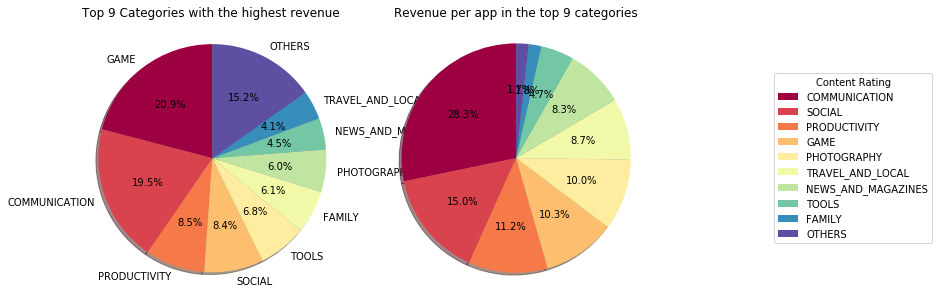

In [0]:
# fa_revenue_per_app_cat.sort_index(inplace = True)
# fa_top9Revenue.sort_index(inplace = True)
fig1, ax = plt.subplots(1,2,figsize=(10,5))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
ax[0].pie(fa_top9Revenue.values,labels= fa_top9Revenue.index, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].title.set_text("Top 9 Categories with the highest revenue")
ax[1].pie(fa_revenue_per_app_cat.values, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors,labeldistance=1.05)
ax[1].axis('equal')
ax[1].legend(fa_revenue_per_app_cat.index,
          title="Content Rating",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))
ax[1].title.set_text("Revenue per app in the top 9 categories")
plt.show()

According to the first pie chart, the revenue from games is the highest amongst all categories in free apps. On the contrary, games fall short to communication in the second pie chart. As of the reason why, revenue is positively affected by the number of apps and installation but revenue per app in different categories is positively effected by the installation and negatively effected by the number of apps. As for games, the number of installations are high, but the number of apps are also rather high. Hence, raising the revenue yet lowering the revenue per app. As of the case for communication, the number of installations are high with a low number of apps, so the revenue will not be able to catch up with games but as of revenue per app, communication comes in first. Another point worth mentioning is the category of family. This category has a high number of apps with a low number of installations. This results in the revenue and revenue per app being rather low though the number of apps are so high. 

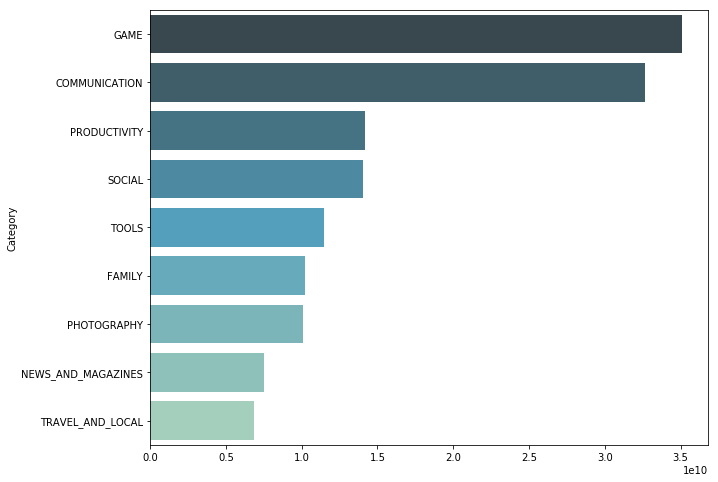

In [0]:
fa_mean_install = fa.groupby("Category").sum()["Clean Installs"].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(fa_mean_install.values,fa_mean_install.index,palette="GnBu_d")
plt.show()

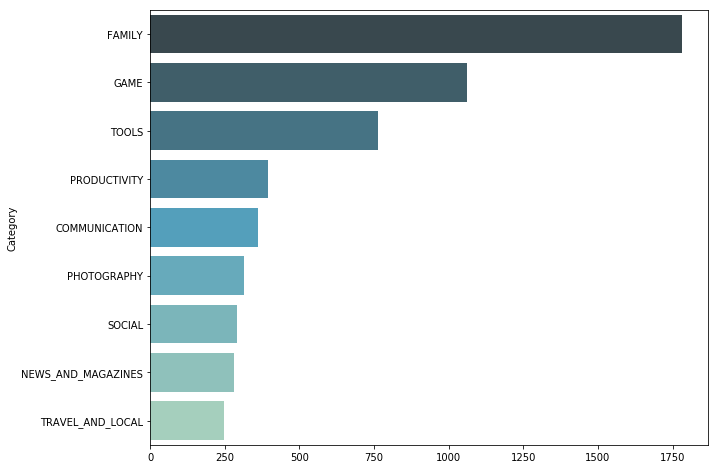

In [0]:
fa_nofapps = fa.groupby("Category").count()["App"].sort_values(ascending=False).head(9)
plt.figure(figsize=(10,8))
sns.barplot(fa_nofapps.values,fa_nofapps.index,palette="GnBu_d")
plt.show()

**Revenue is positively affected by the number of apps and installation**

Revenue per app in different category is positively effected by the installation
and negatively effected by the number of apps

Game: high installation + high app

Com: high installation + low app

Family: low installation + high app

####Which content rating you should aim at?

##### COMMUNICATION

In [0]:
com_high_rating = free_app[(free_app["Category"]=="COMMUNICATION") &\
         (free_app["Content Rating"]!="Everyone") &\
         (free_app["Rating"]>=4)].groupby("Content Rating").count().Rating
com_rating = free_app[(free_app["Category"]=="COMMUNICATION") &\
         (free_app["Content Rating"]!="Everyone")].groupby("Content Rating").count().Rating
com_high_rating_per_rating = com_high_rating/com_rating

In [0]:
com_high_rating_per_rating.to_csv("com_high_rating_per_rating.csv")
files.download('com_high_rating_per_rating.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


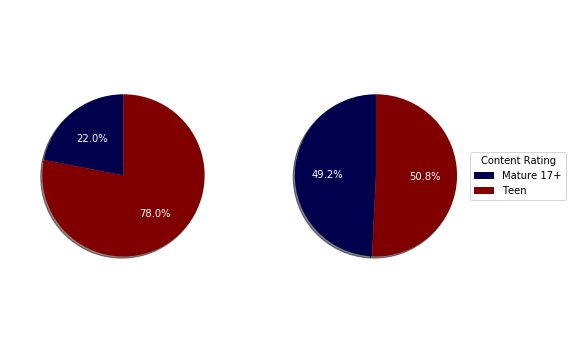

In [0]:
com_content_rating = free_app[(free_app["Category"]=="COMMUNICATION") &\
                          (free_app["Content Rating"]!="Everyone")]["Content Rating"]\
                          .value_counts()\
                          .sort_values(axis=0)
com_content_rating.sort_index(inplace = True)
fig, ax = plt.subplots(1,2,figsize=(8,5))
cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in np.linspace(0, 1, 2)]
ax[0].pie(com_content_rating.values, labels=com_content_rating.index,colors=colors,\
          autopct='%1.1f%%',shadow=True, startangle=90,textprops=dict(color="w"))
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].pie(com_high_rating_per_rating.values, labels=com_high_rating_per_rating.index,colors=colors,\
          autopct='%1.1f%%', shadow=True, startangle=90, textprops=dict(color="w"))
ax[1].axis('equal')
ax[1].legend(com_content_rating.index,
          title="Content Rating",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
fig.tight_layout()
plt.show()

Communication is a matter that every single user requires and uses on a daily basis. Communication can be applied on several different aspects of life,warning of danger, reaching out to people, sales and much more. Though this is something that attracts all people, these apps' main customers are people of age 12 or above since children under 12 aren't exactly requiring any form of communication.



In [0]:
com_content_rating.to_csv("com_content_rating.csv")
files.download('com_content_rating.csv')

##### GAME

In [0]:
game_high_rating = free_app[(free_app["Category"]=="GAME") &\
         (free_app["Content Rating"]!="Everyone") &\
         (free_app["Rating"]>=4)].groupby("Content Rating").count().Rating
game_rating = free_app[(free_app["Category"]=="GAME") &\
         (free_app["Content Rating"]!="Everyone")].groupby("Content Rating").count().Rating
game_high_rating_per_rating = game_high_rating/game_rating

In [0]:
game_high_rating_per_rating.to_csv("game_high_rating_per_rating.csv")
files.download('game_high_rating_per_rating.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
game_content_rating.to_csv("game_content_rating.csv")
files.download('game_content_rating.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


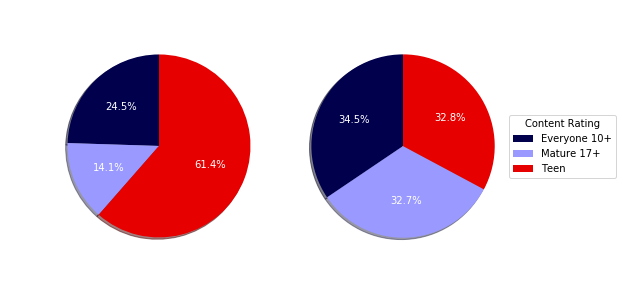

In [0]:
game_content_rating = free_app[(free_app["Category"]=="GAME") &\
                          (free_app["Content Rating"]!="Everyone")]["Content Rating"]\
                          .value_counts()\
                          .sort_values(axis=0)
game_content_rating.sort_index(inplace = True)
fig1, ax = plt.subplots(1,2,figsize=(8,5))
cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in np.linspace(0, 2, 6)]
ax[0].pie(game_content_rating.values, labels=game_content_rating.index,colors=colors,\
          autopct='%1.1f%%',shadow=True, startangle=90,textprops=dict(color="w"))
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].pie(game_high_rating_per_rating.values, labels=game_high_rating_per_rating.index,colors=colors,\
          autopct='%1.1f%%', shadow=True, startangle=90, textprops=dict(color="w"))
ax[1].axis('equal')
ax[1].legend(game_content_rating.index,
          title="Content Rating",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Games are a common form of entertainment found all around us. Games consist of quite a few sub-categories such as rpg, riddles, board and card. These games act us a short and temporary break from reality and everything around them in reality. As of clients, the typical clients are usually teenagers as this acts as a mental and visual stimuli letting the player to release all the thoughts piled up from the real world and how the hormones are having such a large impact on their minds, this helps them have a little leisure and a release from all the tiresome effects of puberty.


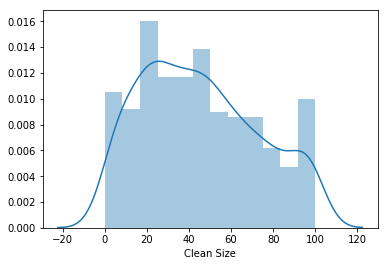

In [0]:
sns.distplot(free_app[(free_app["Category"]=="GAME") &\
                     (~free_app["Clean Size"].isna())]["Clean Size"])

###Paid app

#### Top 9 populated apps and their revenue

In [0]:
pa_top9Revenue = paid_app.groupby("Category").sum()["Revenue"].\
                                    sort_values(ascending=False).head(9)
pa_top9Revenue["OTHERS"] =paid_app["Revenue"].sum() - pa_top9Revenue.sum()

In [0]:
pa_top9Revenue.to_csv("pa_top9Revenue.csv")
files.download('pa_top9Revenue.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
pa = paid_app[paid_app["Category"].isin(pa_top9Revenue.index)]
pa_nofApps = pa.groupby("Category").App.count()
pa_nofApps["OTHERS"] = paid_app[~paid_app["Category"].isin(pa_top9Revenue.index)].App.count()
pa_revenue_per_app_cat = pa_top9Revenue / pa_nofApps
pa_revenue_per_app_cat=pa_revenue_per_app_cat.sort_values(ascending=False)

In [0]:
pa_revenue_per_app_cat.to_csv("pa_revenue_per_app_cat.csv")
files.download('pa_revenue_per_app_cat.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
pa.to_csv("pa.csv")
files.download('pa.csv')

In [0]:
pa_top9Revenue.sort_index(inplace = True)

In [0]:
pa_revenue_per_app_cat.sort_index(inplace = True)

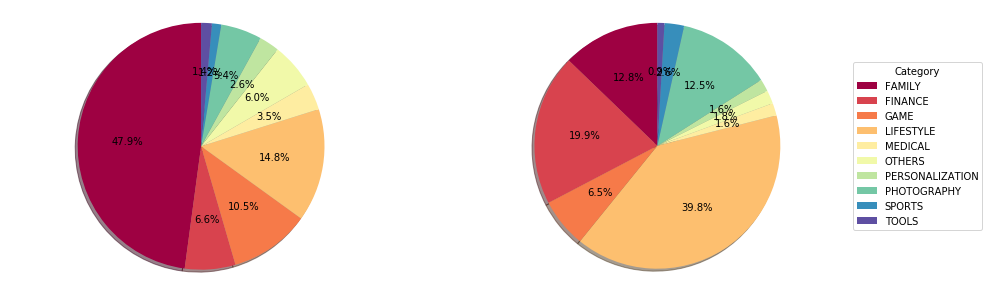

In [0]:
fig1, ax = plt.subplots(1,2,figsize=(15,5))
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
ax[0].pie(pa_top9Revenue.values, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].pie(pa_revenue_per_app_cat.values, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors,labeldistance=1)
ax[1].axis('equal')
ax[1].legend(pa_top9Revenue.index,
          title="Category",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Based on the first pie chart, the revenue from family is the highest amongst all categories. On the other hand, family ranks third behind finance and lifestyle in the second pie chart. As of the reason behind this, revenue is positively affected by the number of apps and installation but revenue per app in different categories is positively effected by the installation and negatively effected by the number of apps. Additionally, there is an additional aspect to priced apps which is the price of these apps. As for family, the number of installations are high, but the number of apps are also rather high, accompanied with a high price. Hence, raising the revenue yet lowering the revenue per app. As of the case for lifestyle, the number of installations and apps are both but the average price is approximately 400 times the average price of games, so the revenue and revenue per app are both immensely raised, thanks to the abruptly high price. Another interesting point is the games. This category has a high number of apps with a high number of installations along with a low price. Although, it is similar to family, these apps are nowhere near as high in installations and apps when compared to family, with the number of apps being about half of those of family.

In [0]:
pa[pa["Category"]=="FAMILY"]

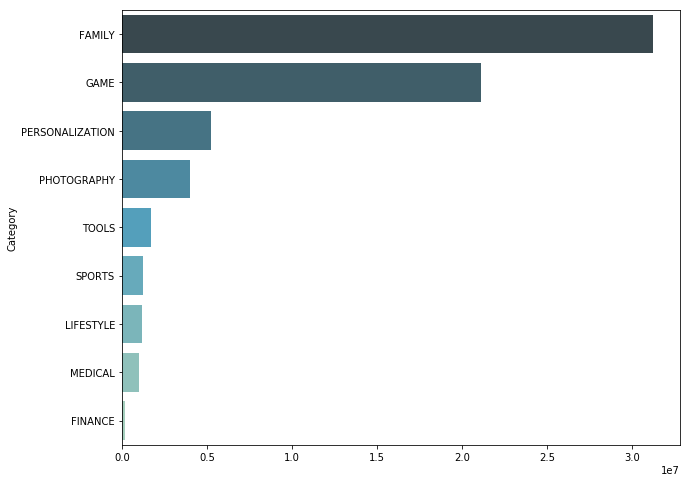

In [0]:
pa_mean_install = pa.groupby("Category").sum()["Clean Installs"].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(pa_mean_install.values,pa_mean_install.index,palette="GnBu_d")
plt.show()

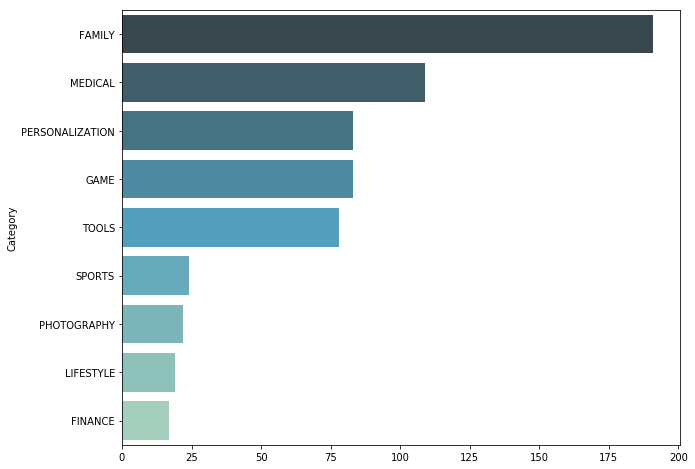

In [0]:
pa_nofapps = pa.groupby("Category").count()["App"].sort_values(ascending=False).head(9)
plt.figure(figsize=(10,8))
sns.barplot(pa_nofapps.values,pa_nofapps.index,palette="GnBu_d")
plt.show()

**Revenue is positively effected by number of apps,price and installation**

Revenue per app in different category is positively effected by the installation and price,
and negatively effected by the installation

Family: high installation + high app + low price

Lifestyle: low installation + low app + high price

Game: high installation + high app + low price

####Which content rating you should aim at?

##### FAMILY

In [0]:
fam_high_rating = paid_app[(paid_app["Category"]=="FAMILY") &\
         (paid_app["Content Rating"]!="Everyone") &\
         (paid_app["Rating"]>=4)].groupby("Content Rating").count().Rating
fam_rating = paid_app[(paid_app["Category"]=="FAMILY") &\
         (paid_app["Content Rating"]!="Everyone")].groupby("Content Rating").count().Rating
fame_per_high_rating = fam_high_rating/fam_rating


In [0]:
fame_per_high_rating.to_csv("fame_per_high_rating.csv")
files.download('fame_per_high_rating.csv')

In [0]:
fam_content_rating.to_csv("fam_content_rating.csv")
files.download('fam_content_rating.csv')

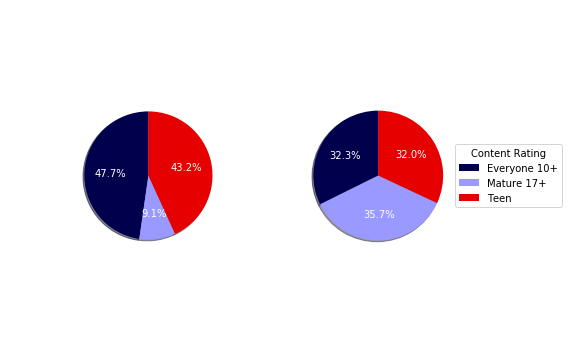

In [0]:
fam_content_rating = paid_app[(paid_app["Category"]=="FAMILY") &\
                          (paid_app["Content Rating"]!="Everyone")]["Content Rating"]\
                          .value_counts()\
                          .sort_values(axis=0)
fam_content_rating.sort_index(inplace = True)
fame_per_high_rating.sort_index(inplace = True)
fig, ax = plt.subplots(1,2,figsize=(8,5))
cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in np.linspace(0, 2, 6)]
ax[0].pie(fam_content_rating.values, labels=fam_content_rating.index,colors=colors,\
          autopct='%1.1f%%',shadow=True, startangle=90,textprops=dict(color="w"))
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].pie(fame_per_high_rating.values, labels=fame_per_high_rating.index,colors=colors,\
          autopct='%1.1f%%', shadow=True, startangle=90, textprops=dict(color="w"))
ax[1].axis('equal')
ax[1].legend(fame_per_high_rating.index,
          title="Content Rating",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
fig.tight_layout()
plt.show()

Family apps are generally educationally apps directed to children but due to the price, these children are unable of purchasing these apps on their own. Therefore, for their children's education, the child's parents will buy them these apps so their child will get to be educated through this app.

In [0]:
fam_content_rating.to_csv("fam_content_rating.csv")
files.download('fam_content_rating.csv')

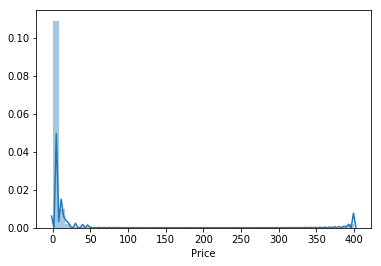

In [0]:
sns.distplot(pa[pa["Category"]=="FAMILY"]["Price"])

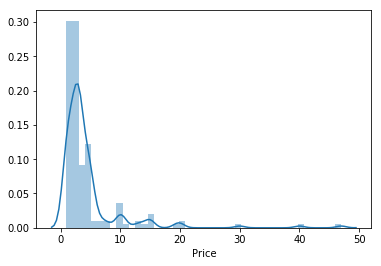

In [0]:
sns.distplot(pa[(pa["Category"]=="FAMILY")&(pa["Price"]<50)]["Price"])

##### LIFESTYLE

In [0]:
life_high_rating = paid_app[(paid_app["Category"]=="LIFESTYLE") &\
         (paid_app["Content Rating"]!="Everyone") &\
         (paid_app["Rating"]>=4)].groupby("Content Rating").count().Rating
life_rating = paid_app[(paid_app["Category"]=="LIFESTYLE") &\
         (paid_app["Content Rating"]!="Everyone")].groupby("Content Rating").count().Rating
life_per_high_rating = life_high_rating/life_rating

In [0]:
life_per_high_rating.to_csv("life_per_high_rating.csv")
files.download('life_per_high_rating.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
life_content_rating.to_csv("life_content_rating.csv")
files.download('life_content_rating.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


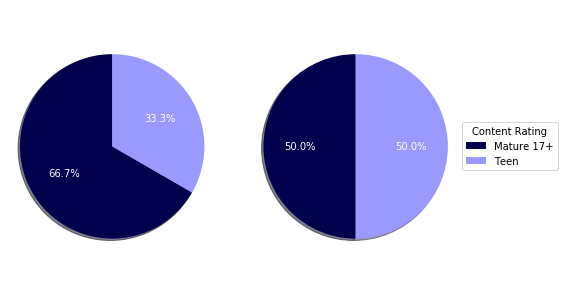

In [0]:
life_content_rating = paid_app[(paid_app["Category"]=="LIFESTYLE") &\
                          (paid_app["Content Rating"]!="Everyone")]["Content Rating"]\
                          .value_counts()\
                          .sort_values(axis=0)
life_content_rating.sort_index(inplace = True)

fig1, ax = plt.subplots(1,2,figsize=(8,5))
cmap = plt.get_cmap('seismic')
colors = [cmap(i) for i in np.linspace(0, 2, 6)]
ax[0].pie(life_content_rating.values,colors=colors,\
          autopct='%1.1f%%',shadow=True, startangle=90,textprops=dict(color="w"))
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].pie(life_per_high_rating.values,colors=colors,\
          autopct='%1.1f%%', shadow=True, startangle=90, textprops=dict(color="w"))
ax[1].axis('equal')
ax[1].legend(life_content_rating.index,
          title="Content Rating",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Lifestyle apps are generally apps that target the users' ego and asking them if they are rich enough to afford the app. All lifestyle apps are usually just based on one format and a variation of the app "I am rich" where there is just one simple inanimate screen of an image, accompanied with a motto, challenging the user to become rich.

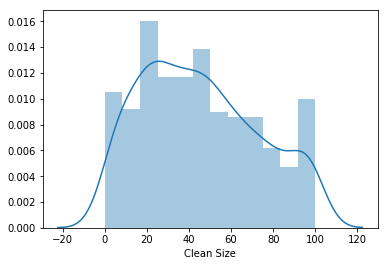

In [0]:
sns.distplot(paid_app[(paid_app["Category"]=="GAME") &\
                     (~paid_app["Clean Size"].isna())]["Clean Size"])

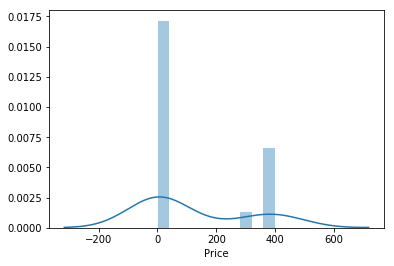

In [0]:
sns.distplot(paid_app[(paid_app["Category"]=="LIFESTYLE") &\
                     (~paid_app["Price"].isna())]["Price"],bins=10)